In [2]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import numpy as np

I will load all of the results from REvoSim and create a graph for each batch. ech batch contains 30 simulations. I will display the average vale of all of the simulations. 

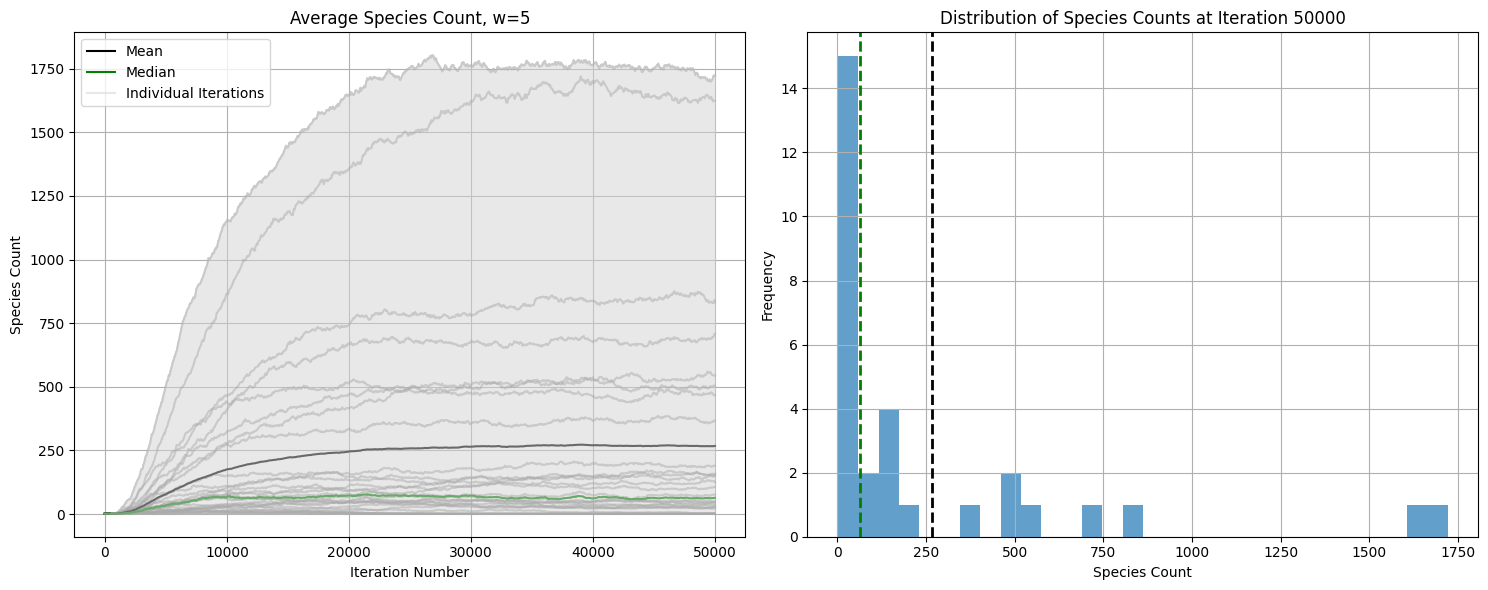

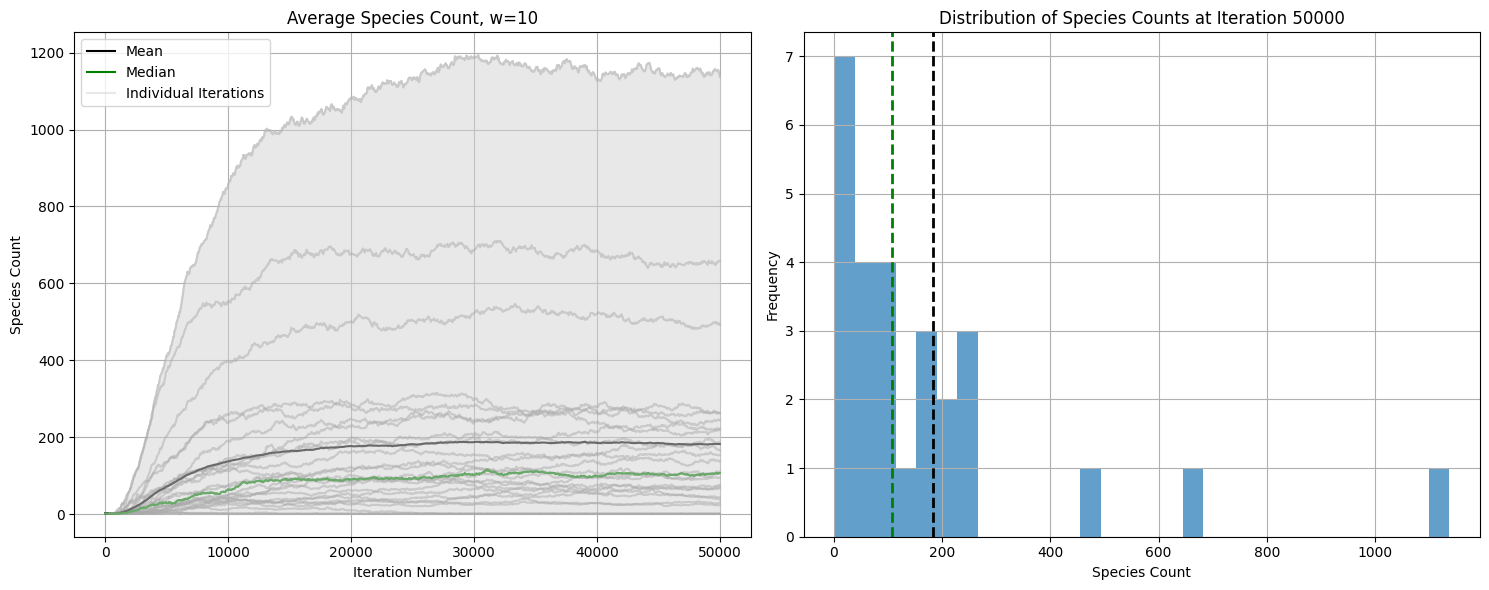

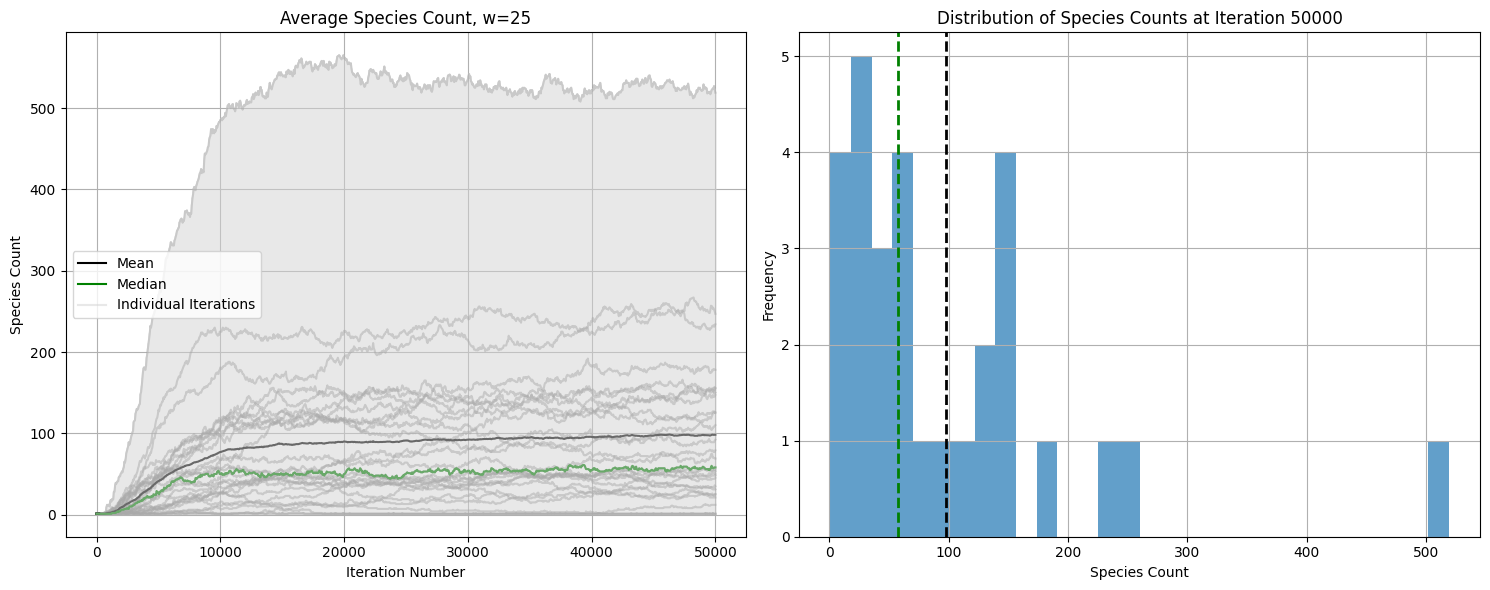

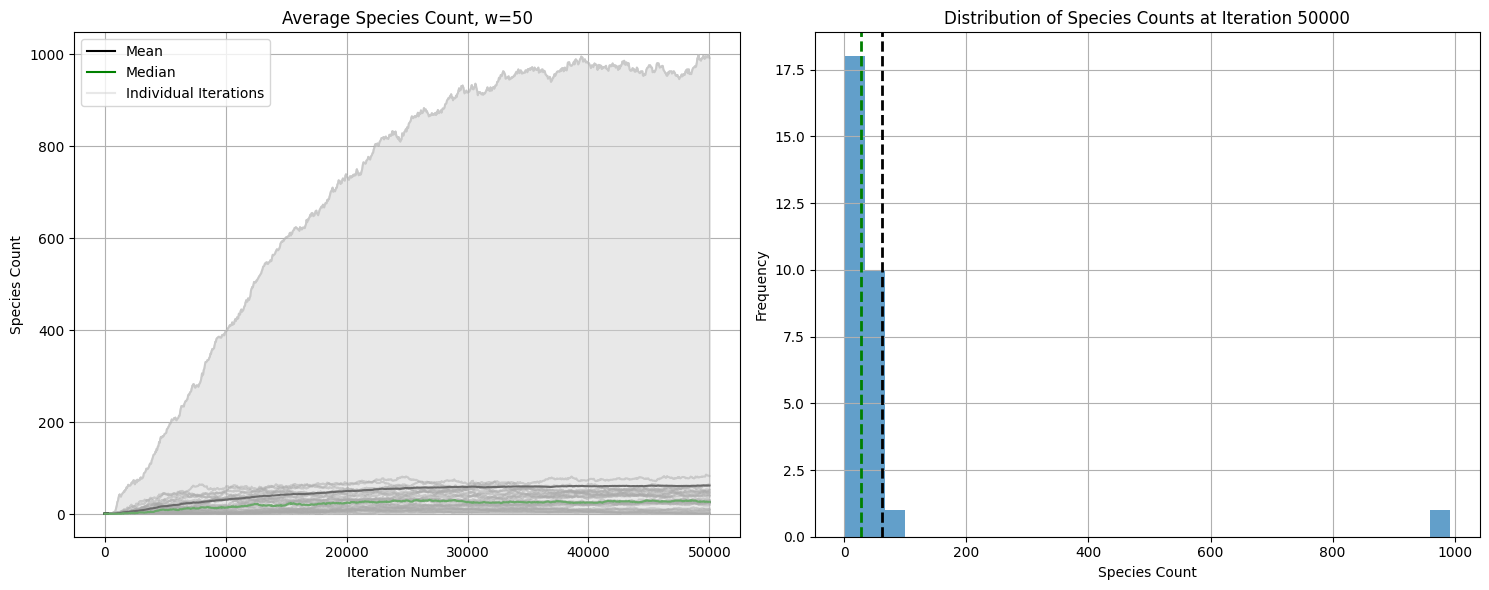

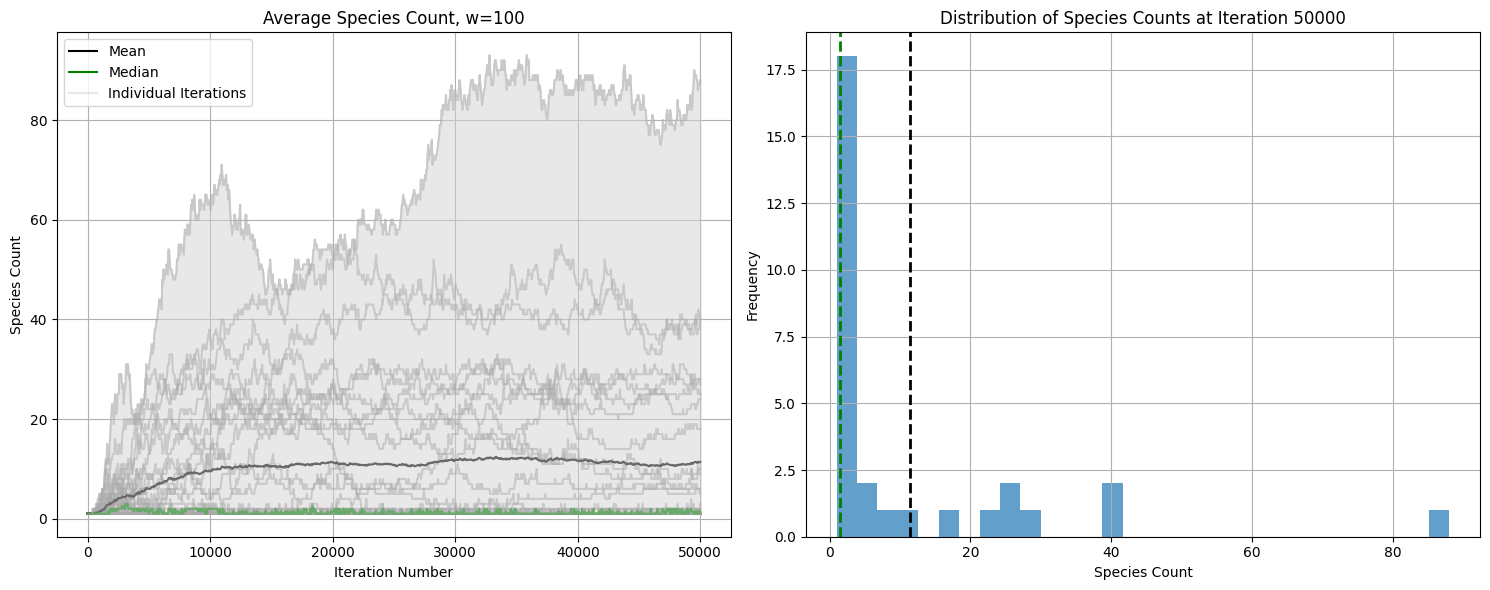

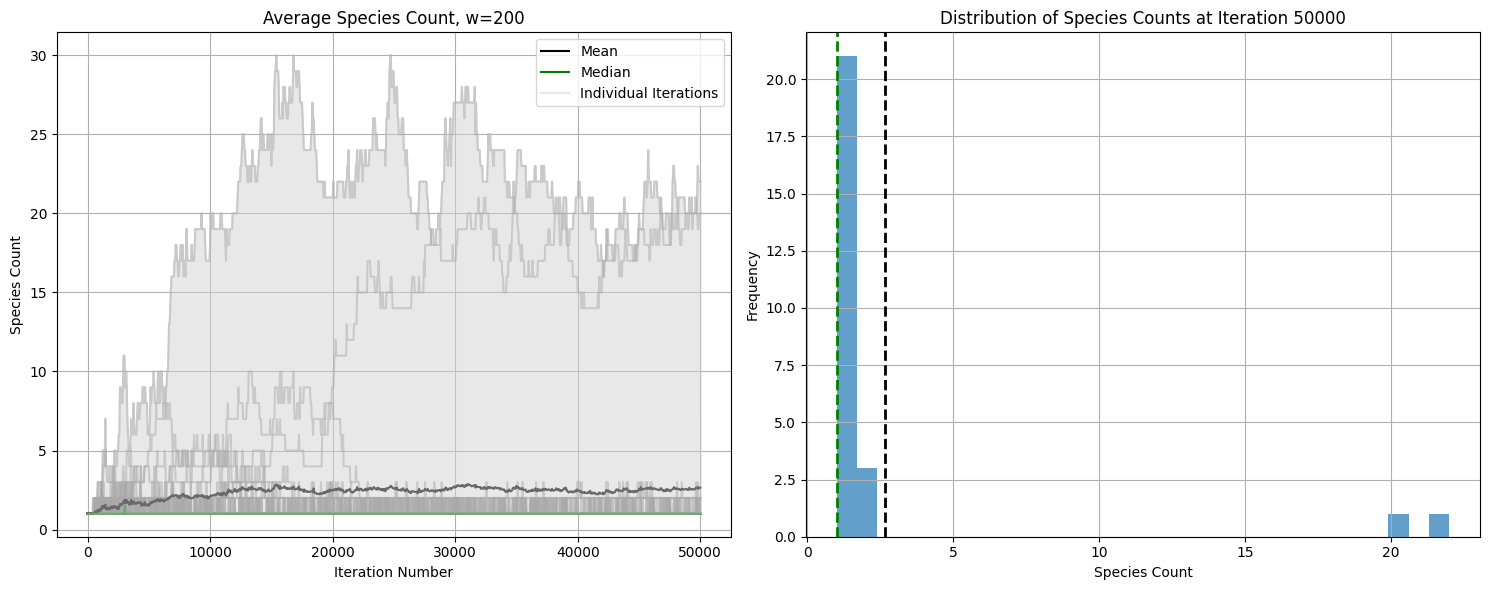

AttributeError: Line2D.set() got an unexpected keyword argument 'palette'

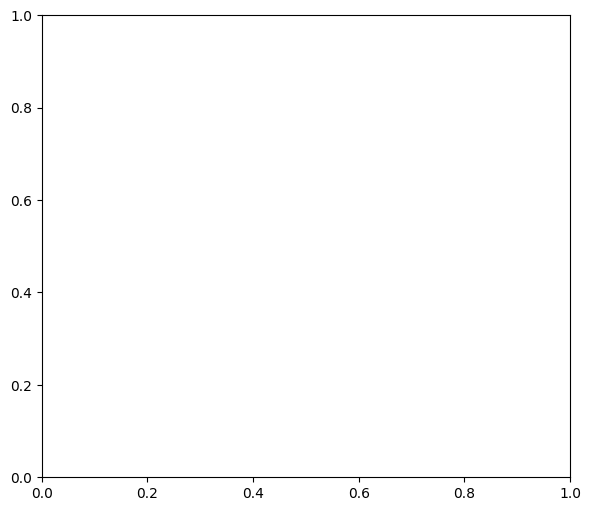

In [3]:
#Define the folders containing the csv files

# List of folder paths
# folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over5/mh',
#     '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over10/mh',
#     '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over25/mh',
#     '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over50/mh',
#     '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over100/mh',
#     '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/mh',]

# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over5/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over10/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over25/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over50/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over100/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over200/mh',]
# Define folder labels
folder_labels = ['w=5', 'w=10', 'w=25', 'w=50', 'w=100', 'w=200']

# Create a list to store average DataFrames for each folder
average_dataframes = []
median_dataframes = []
distribution_counts = []

# Loop through the folders
for i, folder_path in enumerate(folder_paths):
 
    # create a list to store individual DataFrames
    dataframes = []

    #Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5], names=['Iteration_number', 'Species_count'])
            # Remove duplicates
            df = df.drop_duplicates()
            
            dataframes.append(df)
            #plt.plot(df['Iteration_number'], df['Species_count'], color='blue')
            
    
    # Concatenate all DataFrames into one
    all_data = pd.concat(dataframes, ignore_index=True)
    #Sort the DataFrame by 'Iteration_number'
    all_data = all_data.sort_values(by='Iteration_number')

    # Group by 'Iteration_number' and calculate the average 'Species_count'
    average_data = all_data.groupby('Iteration_number')['Species_count'].mean().reset_index()
    median_data = all_data.groupby('Iteration_number')['Species_count'].median().reset_index()

    # Append the average DataFrame to the list
    average_dataframes.append(average_data)
    median_dataframes.append(median_data)
    distribution = all_data.loc[all_data['Iteration_number'] == 49999, 'Species_count'].tolist()
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    for df in dataframes:
        plt.plot(df['Iteration_number'], df['Species_count'], color='gray', alpha=0.5)
    plt.plot(average_data['Iteration_number'], average_data['Species_count'], color='black', label=f'Mean')
    plt.plot(median_data['Iteration_number'], median_data['Species_count'], color='green', label=f'Median')
    plt.plot(all_data['Iteration_number'], all_data['Species_count'], color='lightgray', alpha=0.5, label='Individual Iterations')
    plt.title(f'Average Species Count, {folder_labels[i]}')
    plt.xlabel('Iteration Number')
    plt.ylabel('Species Count')
    #plt.ylim(0, 2500)
    plt.legend()
    plt.grid(True)

    # distribution of values
    plt.subplot(1, 2, 2)
    plt.hist(distribution, bins=30, alpha=0.7)
    plt.title('Distribution of Species Counts at Iteration 50000')
    plt.axvline(np.mean(distribution), color='black', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(np.median(distribution), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.xlabel('Species Count')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    

# ploting the average curves for all folders
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
for i, average_data in enumerate(average_dataframes):
    plt.plot(average_data['Iteration_number'], average_data['Species_count'], label=f'{folder_labels[i]}')
plt.title('Average Species Count in different Environments')
plt.xlabel('Iteration Number')
plt.ylabel('Average Species Count')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i, median_data in enumerate(median_dataframes):
    plt.plot(median_data['Iteration_number'], median_data['Species_count'], label=f'{folder_labels[i]}')
plt.title('Median Species Count in different Environments')
plt.xlabel('Iteration Number')
plt.ylabel('Median Species Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Create a list to store species counts at each iteration number
iteration_numbers = [49999]
species_counts_at_iterations_mean = []
species_counts_at_iterations_median = []

# Loop through the iteration numbers
for iteration_number in iteration_numbers:
    # Use different variable names within the loop
    species_counts_at_iteration_mean_temp = []
    species_counts_at_iteration_median_temp = []

    # Loop through the folders
    for average_data in average_dataframes:
        row_at_iteration = average_data[average_data['Iteration_number'] == iteration_number]
        if not row_at_iteration.empty:
            species_counts_at_iteration_mean_temp.append(row_at_iteration['Species_count'].values[0])
        else:
            species_counts_at_iteration_mean_temp.append(None)

    # Append the species counts at the current iteration number to the main list
    species_counts_at_iterations_mean.append(species_counts_at_iteration_mean_temp)
    
    # Loop through the folders
    for median_data in median_dataframes:
        row_at_iteration = median_data[median_data['Iteration_number'] == iteration_number]
        if not row_at_iteration.empty:
            species_counts_at_iteration_median_temp.append(row_at_iteration['Species_count'].values[0])
        else:
            species_counts_at_iteration_median_temp.append(None)

    # Append the species counts at the current iteration number to the main list
    species_counts_at_iterations_median.append(species_counts_at_iteration_median_temp)

# Plot the data
plt.figure(figsize=(15, 6))

# Use plt.subplot, not plt.subplots
plt.subplot(1, 2, 1)
for i, iteration_number in enumerate(iteration_numbers):
    plt.plot(w_values, species_counts_at_iterations_mean[i], marker='o', label=f'Iteration {iteration_number}')

plt.title('Number of Species at Different Iteration Numbers for different Environments - mean')
plt.xlabel('Wavelength of Environment (w)')
plt.ylabel('Species Count Average')
plt.grid(True)

plt.subplot(1, 2, 2)
for i, iteration_number in enumerate(iteration_numbers):
    plt.plot(w_values, species_counts_at_iterations_median[i], marker='o', label=f'Iteration {iteration_number}')

plt.title('Number of Species at Different Iteration Numbers for different Environments - median')
plt.xlabel('Wavelength of Environment (w)')
plt.ylabel('Species Count Median')
plt.grid(True)

plt.tight_layout()
plt.show()



Now I want to see what is the relationship between environment variability (as Wavelength) vs species counts at equilibrium

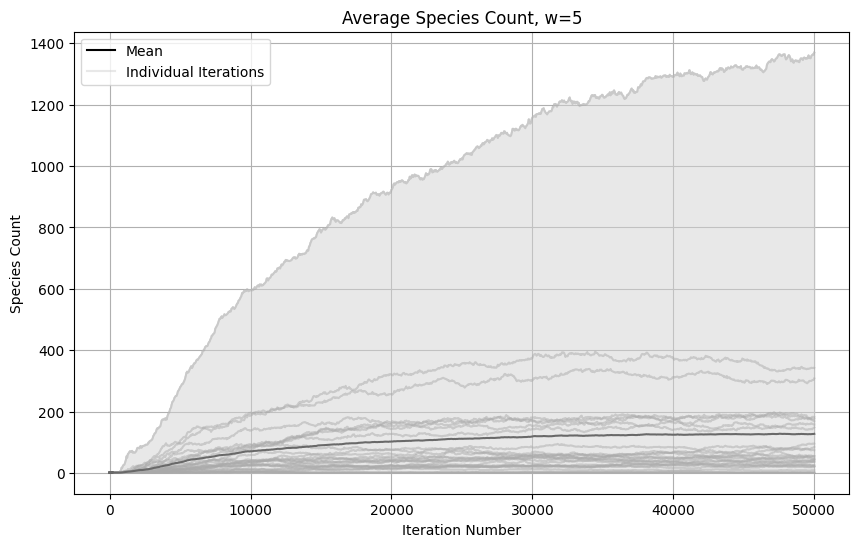

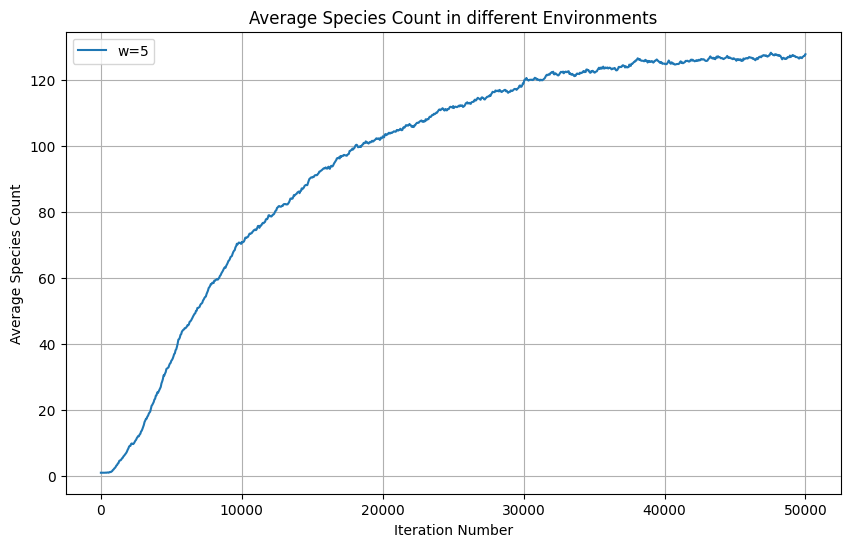

In [20]:
# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/2nd batches - Blue channel/1over50/mh',]
# Define folder labels
folder_labels = ['w=5', 'w=10', 'w=25', 'w=50', 'w=100', 'w=200']

# Create a list to store average DataFrames for each folder
average_dataframes = []
median_dataframes = []

# Loop through the folders
for i, folder_path in enumerate(folder_paths):
 
    # create a list to store individual DataFrames
    dataframes = []

    #Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5], names=['Iteration_number', 'Species_count'])
            # Remove duplicates
            df = df.drop_duplicates()
            
            dataframes.append(df)
            #plt.plot(df['Iteration_number'], df['Species_count'], color='blue')
            
    

    # Concatenate all DataFrames into one
    all_data = pd.concat(dataframes, ignore_index=True)
    #Sort the DataFrame by 'Iteration_number'
    all_data = all_data.sort_values(by='Iteration_number')

    # Group by 'Iteration_number' and calculate the average 'Species_count'
    average_data = all_data.groupby('Iteration_number')['Species_count'].mean().reset_index()
    median_data = all_data.groupby('Iteration_number')['Species_count'].median().reset_index()

    # Append the average DataFrame to the list
    average_dataframes.append(average_data)
    median_dataframes.append(median_data)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    for df in dataframes:
        plt.plot(df['Iteration_number'], df['Species_count'], color='gray', alpha=0.5)
    plt.plot(average_data['Iteration_number'], average_data['Species_count'], color='black', label=f'Mean')
    #plt.plot(median_data['Iteration_number'], median_data['Species_count'], color='red', label=f'Median')
    plt.plot(all_data['Iteration_number'], all_data['Species_count'], color='lightgray', alpha=0.5, label='Individual Iterations')
    plt.title(f'Average Species Count, {folder_labels[i]}')
    plt.xlabel('Iteration Number')
    plt.ylabel('Species Count')
    #plt.ylim(0, 2500)
    plt.legend()
    plt.grid(True)
    plt.show()

# ploting the average curves for all folders
plt.figure(figsize=(10, 6))
for i, average_data in enumerate(average_dataframes):
    plt.plot(average_data['Iteration_number'], average_data['Species_count'], label=f'{folder_labels[i]}')
plt.title('Average Species Count in different Environments')
plt.xlabel('Iteration Number')
plt.ylabel('Average Species Count')
plt.legend()
plt.grid(True)
plt.show()

The follwong code is the same but for an environment where all of the three rgb channels are changing, meaning that we are in a simulation with 3 environmental variables changing. 

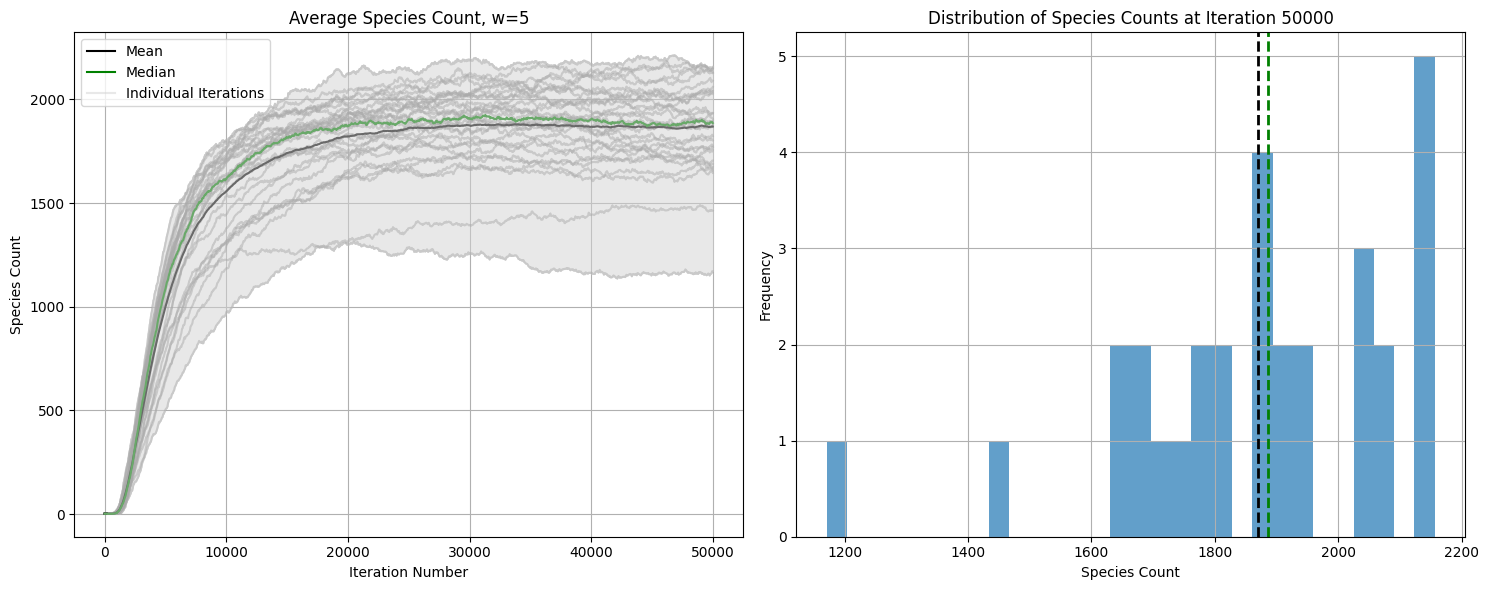

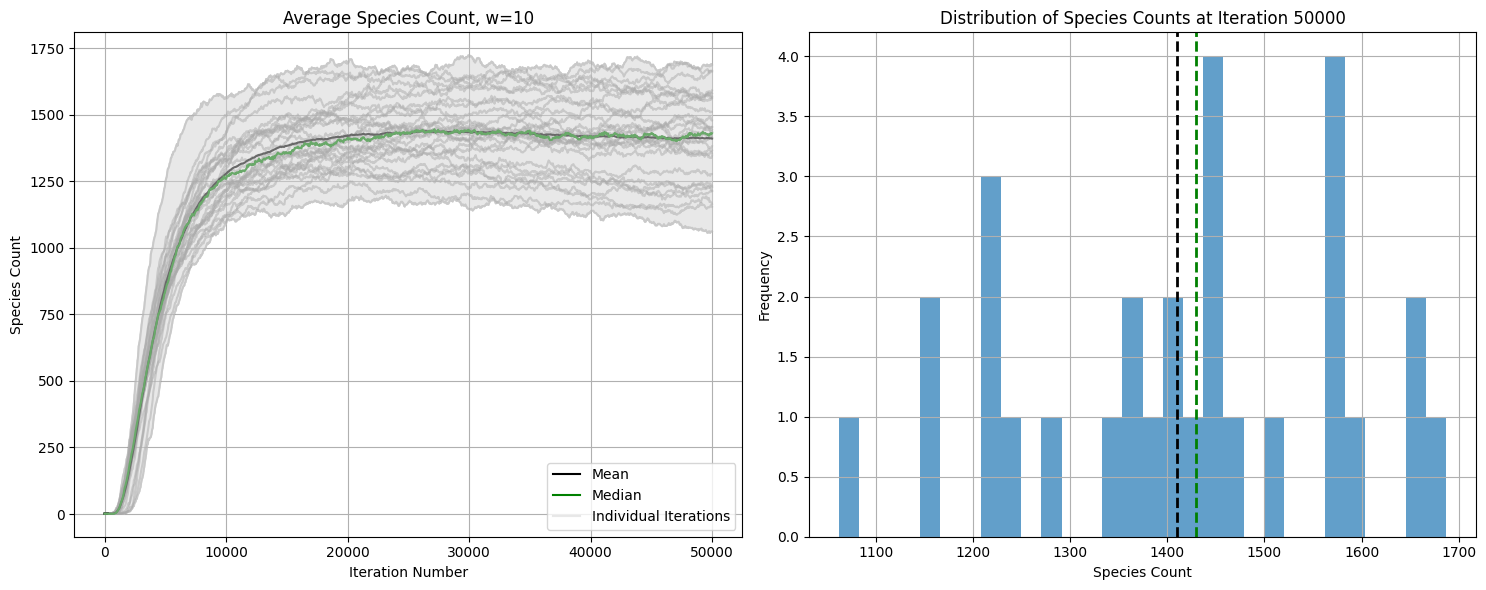

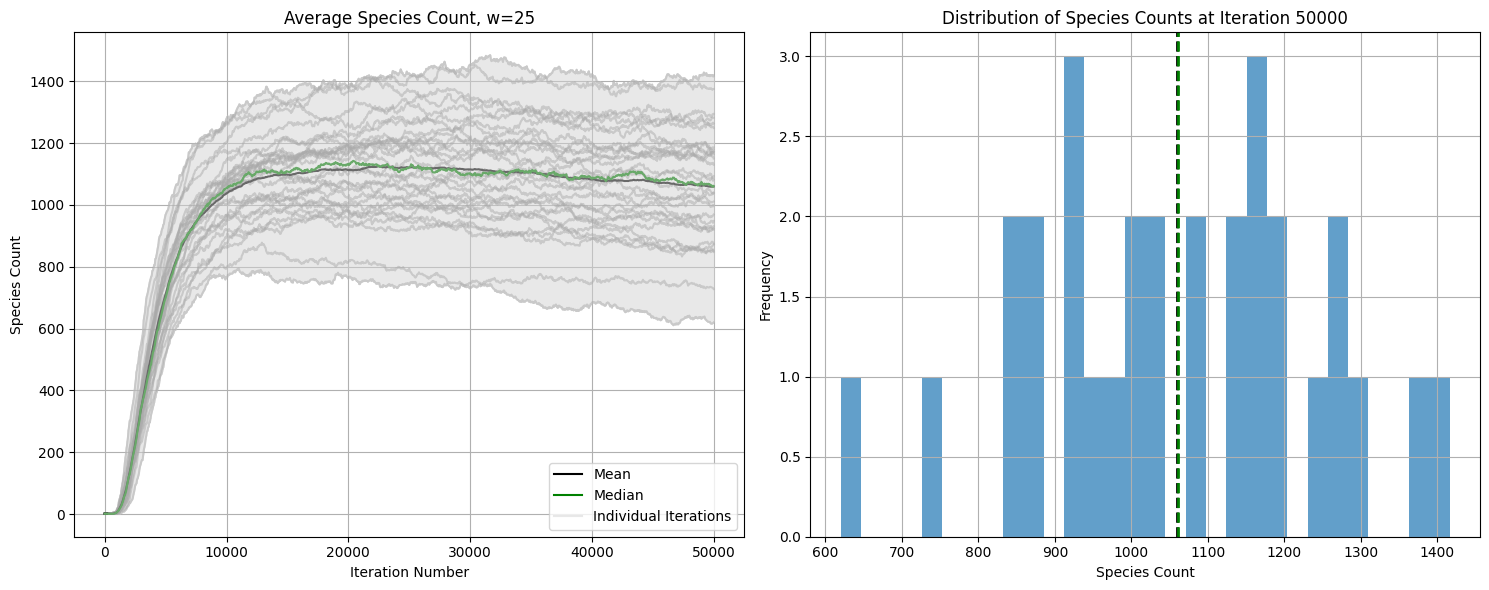

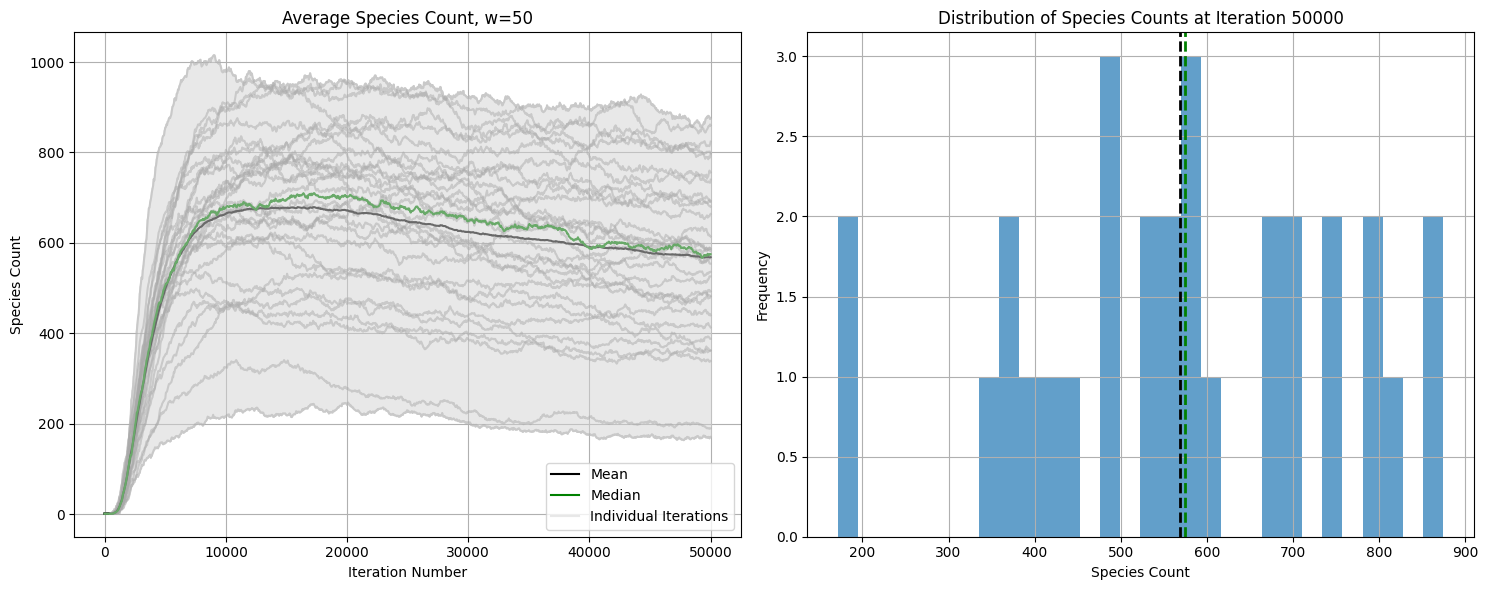

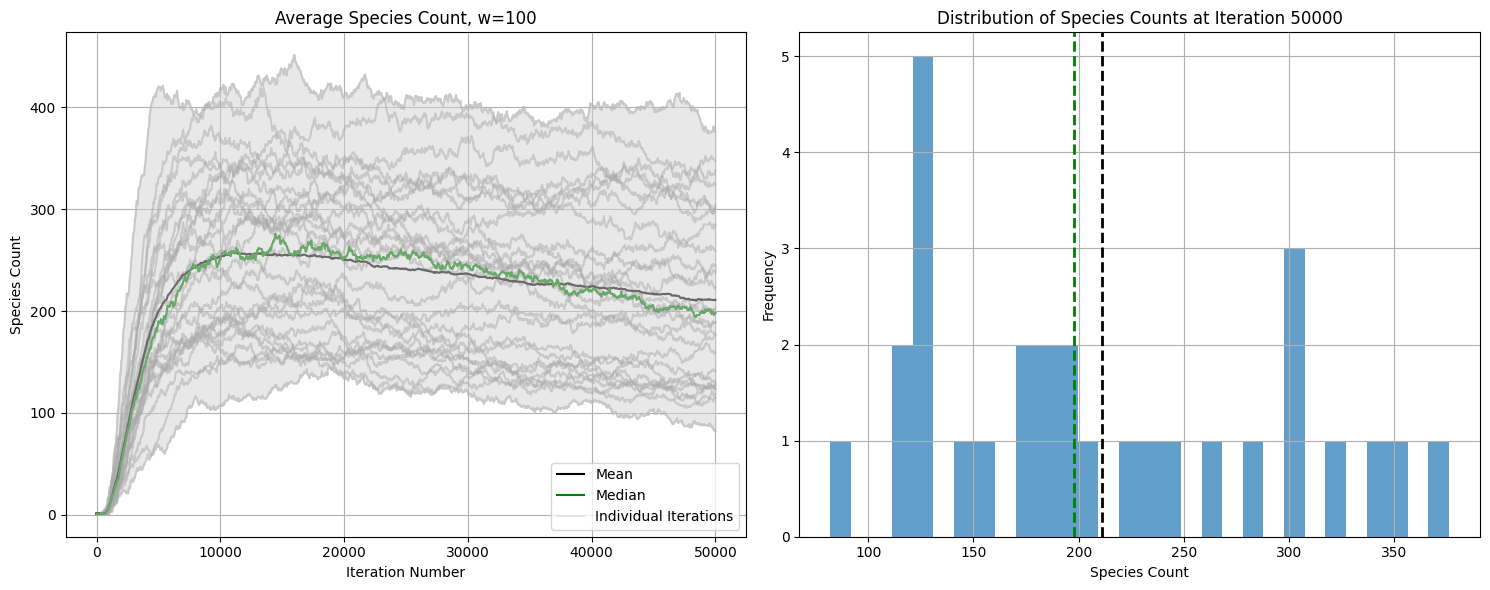

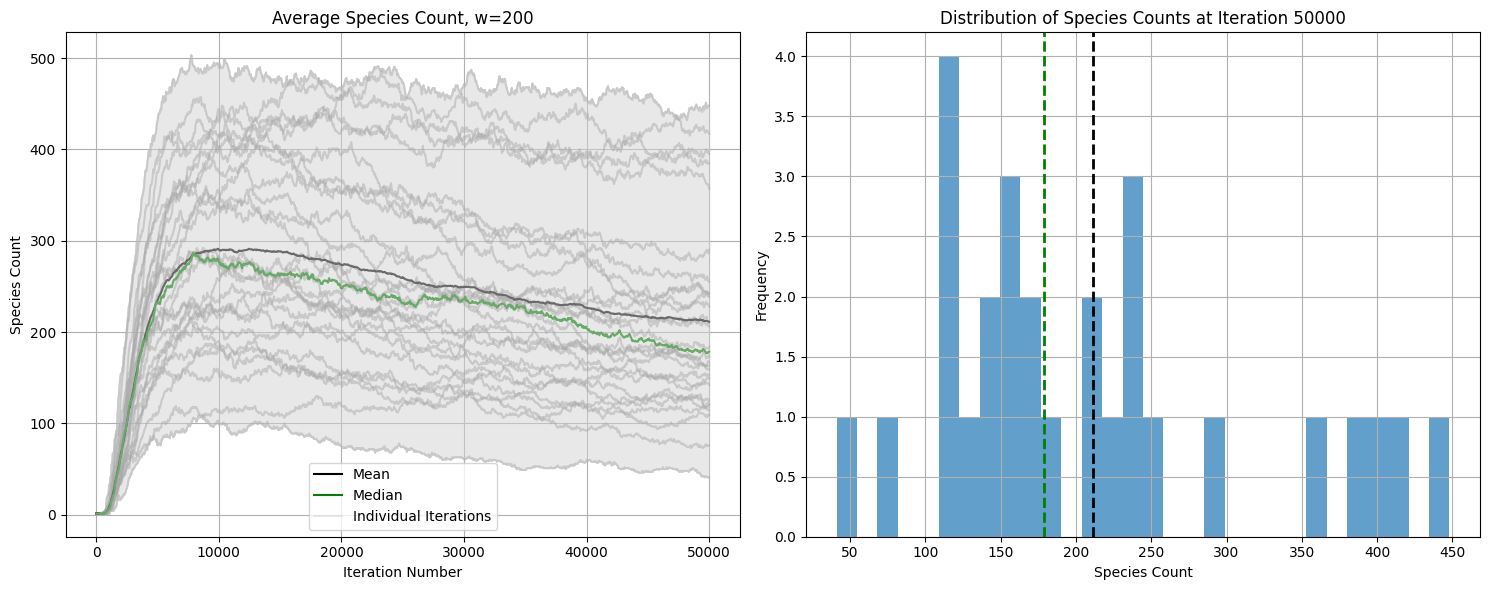

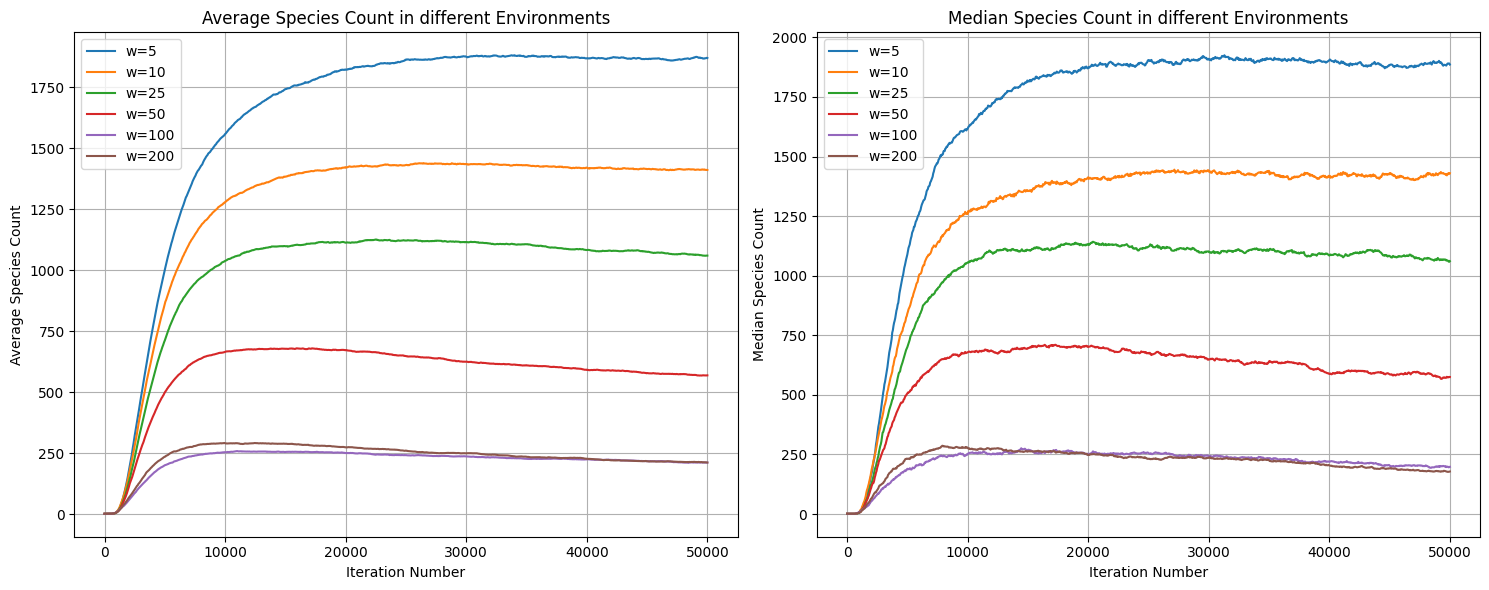

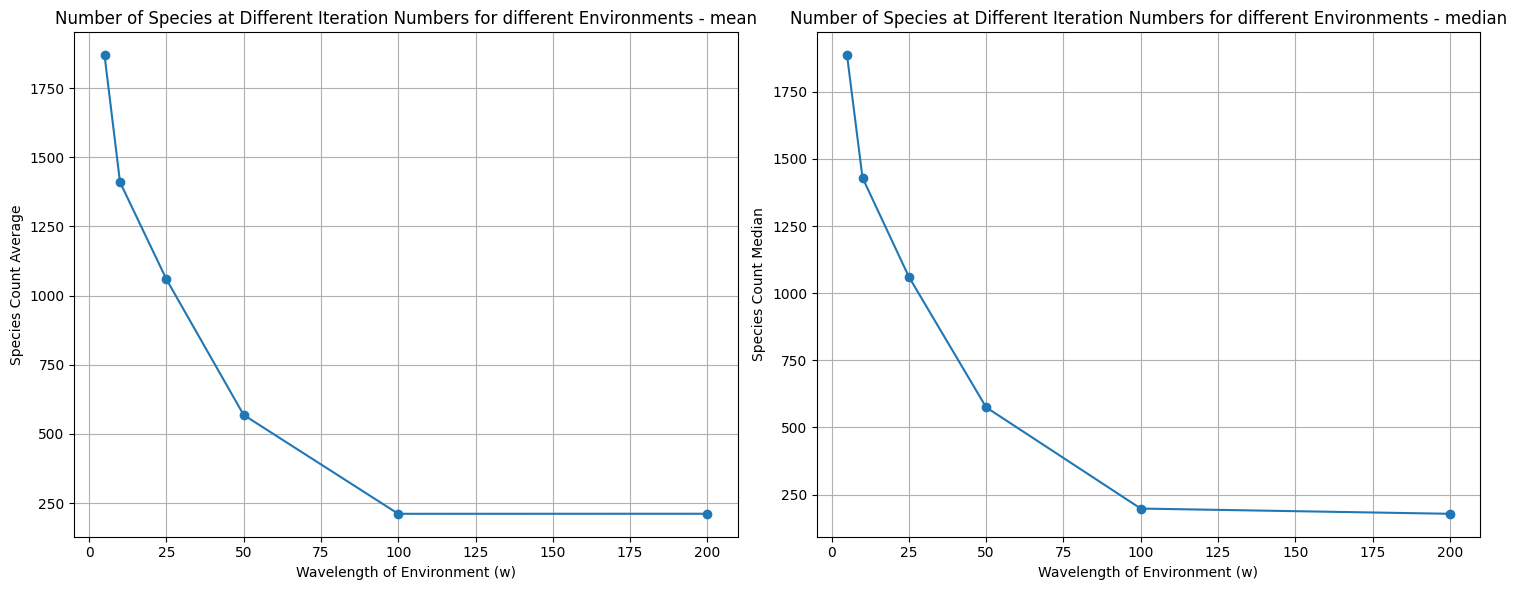

In [42]:
#Define the folders containing the csv files

#List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over5/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over10/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over25/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over50/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over100/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over200/mh',]

# # List of folder paths
# folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over5/mh',
#     '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over10/mh',
#     '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over25/mh',
#     '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over50/mh',
#     '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over100/mh',
#     '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over200/mh',]
# Define folder labels
folder_labels = ['w=5', 'w=10', 'w=25', 'w=50', 'w=100', 'w=200']

# Create a list to store average DataFrames for each folder
average_dataframes = []
median_dataframes = []
distribution_counts = []

# Loop through the folders
for i, folder_path in enumerate(folder_paths):
 
    # create a list to store individual DataFrames
    dataframes = []

    #Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5], names=['Iteration_number', 'Species_count'])
            # Remove duplicates
            df = df.drop_duplicates()
            
            dataframes.append(df)
            #plt.plot(df['Iteration_number'], df['Species_count'], color='blue')
            
    
    # Concatenate all DataFrames into one
    all_data = pd.concat(dataframes, ignore_index=True)
    #Sort the DataFrame by 'Iteration_number'
    all_data = all_data.sort_values(by='Iteration_number')

    # Group by 'Iteration_number' and calculate the average 'Species_count'
    average_data = all_data.groupby('Iteration_number')['Species_count'].mean().reset_index()
    median_data = all_data.groupby('Iteration_number')['Species_count'].median().reset_index()

    # Append the average DataFrame to the list
    average_dataframes.append(average_data)
    median_dataframes.append(median_data)
    distribution = all_data.loc[all_data['Iteration_number'] == 49999, 'Species_count'].tolist()
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    for df in dataframes:
        plt.plot(df['Iteration_number'], df['Species_count'], color='gray', alpha=0.5)
    plt.plot(average_data['Iteration_number'], average_data['Species_count'], color='black', label=f'Mean')
    plt.plot(median_data['Iteration_number'], median_data['Species_count'], color='green', label=f'Median')
    plt.plot(all_data['Iteration_number'], all_data['Species_count'], color='lightgray', alpha=0.5, label='Individual Iterations')
    plt.title(f'Average Species Count, {folder_labels[i]}')
    plt.xlabel('Iteration Number')
    plt.ylabel('Species Count')
    #plt.ylim(0, 2500)
    plt.legend()
    plt.grid(True)

    # distribution of values
    plt.subplot(1, 2, 2)
    plt.hist(distribution, bins=30, alpha=0.7)
    plt.title('Distribution of Species Counts at Iteration 50000')
    plt.axvline(np.mean(distribution), color='black', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(np.median(distribution), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.xlabel('Species Count')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    

# ploting the average curves for all folders
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
for i, average_data in enumerate(average_dataframes):
    plt.plot(average_data['Iteration_number'], average_data['Species_count'], label=f'{folder_labels[i]}')
plt.title('Average Species Count in different Environments')
plt.xlabel('Iteration Number')
plt.ylabel('Average Species Count')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i, median_data in enumerate(median_dataframes):
    plt.plot(median_data['Iteration_number'], median_data['Species_count'], label=f'{folder_labels[i]}')
plt.title('Median Species Count in different Environments')
plt.xlabel('Iteration Number')
plt.ylabel('Median Species Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Create a list to store species counts at each iteration number
iteration_numbers = [49999]
species_counts_at_iterations_mean = []
species_counts_at_iterations_median = []

# Loop through the iteration numbers
for iteration_number in iteration_numbers:
    # Use different variable names within the loop
    species_counts_at_iteration_mean_temp = []
    species_counts_at_iteration_median_temp = []

    # Loop through the folders
    for average_data in average_dataframes:
        row_at_iteration = average_data[average_data['Iteration_number'] == iteration_number]
        if not row_at_iteration.empty:
            species_counts_at_iteration_mean_temp.append(row_at_iteration['Species_count'].values[0])
        else:
            species_counts_at_iteration_mean_temp.append(None)

    # Append the species counts at the current iteration number to the main list
    species_counts_at_iterations_mean.append(species_counts_at_iteration_mean_temp)
    
    # Loop through the folders
    for median_data in median_dataframes:
        row_at_iteration = median_data[median_data['Iteration_number'] == iteration_number]
        if not row_at_iteration.empty:
            species_counts_at_iteration_median_temp.append(row_at_iteration['Species_count'].values[0])
        else:
            species_counts_at_iteration_median_temp.append(None)

    # Append the species counts at the current iteration number to the main list
    species_counts_at_iterations_median.append(species_counts_at_iteration_median_temp)

# Plot the data
plt.figure(figsize=(15, 6))

# Use plt.subplot, not plt.subplots
plt.subplot(1, 2, 1)
for i, iteration_number in enumerate(iteration_numbers):
    plt.plot(w_values, species_counts_at_iterations_mean[i], marker='o', label=f'Iteration {iteration_number}')

plt.title('Number of Species at Different Iteration Numbers for different Environments - mean')
plt.xlabel('Wavelength of Environment (w)')
plt.ylabel('Species Count Average')
plt.grid(True)

plt.subplot(1, 2, 2)
for i, iteration_number in enumerate(iteration_numbers):
    plt.plot(w_values, species_counts_at_iterations_median[i], marker='o', label=f'Iteration {iteration_number}')

plt.title('Number of Species at Different Iteration Numbers for different Environments - median')
plt.xlabel('Wavelength of Environment (w)')
plt.ylabel('Species Count Median')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# # teration numbers for whihc I want the graph
# iteration_numbers = [49999]

# # Create a list to store species counts at each iteration number
# species_counts_at_iterations = []

# # Loop through the iteration numbers
# for iteration_number in iteration_numbers:
#     species_counts_at_iteration = []

#     # Loop through the folders
#     for average_data in average_dataframes:
#         # Find the row where Iteration_number matches the current iteration number
#         row_at_iteration = average_data[average_data['Iteration_number'] == iteration_number]

#         # Append the corresponding Species_count to the list
#         if not row_at_iteration.empty:
#             species_counts_at_iteration.append(row_at_iteration['Species_count'].values[0])
#         else:
#             # case where there is no data for the current iteration number, although there should always be
#             species_counts_at_iteration.append(None)

#     # Append the species counts at the current iteration number to the main list
#     species_counts_at_iterations.append(species_counts_at_iteration)

# # Plot the data
# plt.figure(figsize=(10, 6))
# for i, iteration_number in enumerate(iteration_numbers):
#     plt.plot(folder_labels, species_counts_at_iterations[i], marker='o', label=f'Iteration {iteration_number}')

# plt.title('Number of Species at Different Iteration Numbers for different Environments')
# plt.xlabel('Environment (w)')
# plt.ylabel('Species Count')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# # The following is just to assesed if 30000 iterations is enough to reach plateau
# #Define the folder containing your CSV files
# folder_path = '/Users/gb4818/Desktop/batchof3w5'

# # reate a list to store individual DataFrames
# dataframes = []

# #Loop through each file in the folder and read it into a DataFrame
# for filename in os.listdir(folder_path):
#     if filename.endswith(".txt"):
#         file_path = os.path.join(folder_path, filename)
        
#         # Specify the correct separator based on your data
#         df = pd.read_csv(file_path, sep=',')  # Adjust the separator if necessary
#         dataframes.append(df)
        
#         # Print column names for each file
#         print(f"Columns in {filename}: {df.columns}")

# # Concatenate all DataFrames into one
# all_data = pd.concat(dataframes, ignore_index=True)

# #Sort the DataFrame by 'Iteration_number'
# all_data = all_data.sort_values(by='Iteration_number')

# # Group by 'Iteration_number' and calculate the average 'Species_count'
# average_data = all_data.groupby('Iteration_number')['Species_count'].mean().reset_index()

# # Plot the data
# plt.figure(figsize=(10, 6))
# plt.plot(all_data['Iteration_number'], all_data['Species_count'], color='lightgray', alpha=0.5, label='Individual Iterations')
# plt.plot(average_data['Iteration_number'], average_data['Species_count'], color='black', label='Average')
# plt.title('Average Species Count Over Iterations')
# plt.xlabel('Iteration Number')
# plt.ylabel('Species Count')
# plt.legend()
# plt.grid(True)
# plt.show()